<center> <h2> DS 3000 - Fall 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h1>Analyzing the performance of the MBTA</h1> </center>
<center><h4>Lei, Dan, and Ethan</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

This project is an analysis of the MBTA and how the  


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION (Ethan)

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
* Describe the problem you would like to tackle. 
* What is the topic of your project? 
* What do you want to learn about it?

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* Has there been previous work on your topic? Do some research into your topic. Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Questions/Hypothesis
* End this section with a list of questions and hypotheses
* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms in predicting your target variable from your features variables.

The MBTA is a very old public transport system, and as a result of that age, some cracks have begun to show. Public transit is a very important service for many commuters who do not own cars, and because of that, improving public transit can make a direct improvement on many people’s lives. For our project, we want to take a look at what exactly the flaws are in the train system, and what can be done to fix it. Since our datasets include information about wait times, ridership count, rider satisfaction, and many specifics about the train lines themselves, we will do this by examining how these factors affect the overall satisfaction with the MBTA, and how different train lines vary in their quality.


The questions we have formulated regarding are dataset are as follows:
* Which trains have a significant difference in average arrival delays?
* How does customer satisfaction vary with the number of riders, and type of transport? (and assuming it is affected by those, What could we suggest for the MBTA to do to increase satisfaction?)
* How does the MBTA fare increase affect customer satisfaction and ridership?

The hypotheses we have formulated regarding are dataset are as follows:
* Long arrival delays negatively affect customer satisfaction.
* Congestion negatively affect customer satisfaction.
* Increased MBTA fare lowers the ridership.
* Data Analysis Plan

Based on our variables, we were hoping to see and possibly predict where some problematic areas of the MBTA system may be. One of the key areas we were hoping to investigate would be the wait times and to see how they have been changing over time. This coupled with customer satisfaction and fare rate could help us determine which areas are prime targets for upgrade/fixes in the future. Based off of that, we could also see if a price change would be needed in the near future by observing how drastic of a change in customer satisfaction is predicted by our model. 
We believe that machine learning could prove helpful when conducting our analysis. By using clustering techniques, we could if any train lines are particularly problematic and to see if we need to focus our analysis there. Using regression techniques, we could attempt to predict future problems that may not be easily observed using traditional statistical analysis. 


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition (Ethan)

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset and variables. What do variables represent?


All the data for project comes from this website: https://mbtabackontrack.com/performance/#/download. It contains a large amount of data concerning the MBTA that is updated on a monthly basis.
#### Weekly Ridership
This dataset holds information on how many riders took the MBTA on a given week.

**Variable name in file**|**Description**
:-----:|:-----:
Date|Date for which month of the data recorded
Mode|The type of the MBTA
Ridership|Number of trips of passengers in the MBTA system for the specific period
CountOfDates|The number of weekdays in this month
Avg\_Ridership|Average Ridership per weekday
Route of Line|Specific line of the MBTA

#### Ontime Performance
This dataset provides information about how reliable a commuter service was for a given week.

**Variable Name in File**|**Description**
:-----:|:-----:
gtfs\_route\_id|The id for the transport.
gtfs\_route\_short\_name|The short name for the route
gtfs\_route\_long\_name|The full name of the route: (Red Line, Green Line, Framingham/Worcester Line, etc)
gtfs\_route\_desc|The type of transport: (Bus, Subway, Commuter Rail). Also differentiates between local buses, express buses, and key bus routes.
route\_category|Either displays the name of the subway line, if the bus is key or not, or nothing in the case of commuter rails.
mode\_type|The type of transport: The type of transport: (Bus, Subway, Commuter Rail). Does not differentiate between types of buses.
service\_date|The day that the reliability was measured.
peak\_offpeak\_ind|Whether the service was peak or off-peak.
metric\_type|The metric which reliability was measured for the transport type. Each have slightly different ways of measuring reliability.
otp\_numerator|The numerator of the On-Time Percentage.
otp\_denominator|The denominator of the On-Time Percentage.

#### Rider Satisfaction
This dataset provides data on a monthly survey conducted by the MBTA, gauging the satisfaction of the riders of MBTA regarding specific and general parts of the MBTA.

**Variable Name in File**|**Description**
:-----:|:-----:
survey_id|The id of the row
survey_date|The date that the survey was conducted (Usually the first day of the month)
survey_name|The name of the survey
question_description|The question being asked
response_total|The amount of responses received
response_x_text|The text of response for a multiple-choice answer
response_x_percent|The percent of participants that chose this response

### 2.2. Variables (Lei / Dan)
* If you are testing hypotheses, what are your IVs and DVs?
* For your predictive models, what are your features and target variables?

For the first hypothesis, IV is long arrival delays which is represented with reliability of the trains as well as DV is customer satisfaction which is represented as the score from wait time at stop and overall rating of MBTA. Then in the second hypothesis, IV is cogestion which is showed as ridership of the trains. DV keeps the same as customer satisfaction but it's represented with vehicle crowdedness from questionnaire from customer surveys. For the last hypothesis we have, IV is the increased MBTA fare and the DV is ridership.

### 2.3. Data Analysis (Dan)
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables?
* Describe whether this is a supervised or unsupervised learning problem. Also identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? Why?

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling (Ethan)
* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to extract your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [2]:
import pandas as pd

In [3]:
# Returns a DataFrame with statistics about the reliability of a transport service.
def get_reliability_df():
    df = pd.read_csv("https://raw.githubusercontent.com/ethan-leba/data-science-mtba/master/resources/combined_ontime_performance.csv")
    
    # Filter out rows not concerning the trains as we are not analyzing this data
    df = df[df['mode_type'] == 'Rail']
    
    # Create a reliability percentage row
    df['pct_reliability'] = df['otp_numerator'] / df['otp_denominator']
    
    # Remove extraneous columns
    df = df[['gtfs_route_id', 'service_date', 'pct_reliability']]
    
    # Rename columns
    df = df.rename(columns={'gtfs_route_id':'train_line'})
    
    return df

In [4]:
# Returns a DataFrame with statistics about the rider's satisfaction with the MBTA.
def get_rider_satisfaction_df():
    # The CSV file contains 7 categories of satisfaction, ranging from
    # Extremely dissatisfied to extremely satisfied, and a percentage of 
    # responses for each answer. To make analysis easier to conduct, we are
    # converting these columns in a score ranging from 1 to 7 of satisfaction.
    def response_to_num(df, amt):
        pct = df.copy()["response_1_percent"]
        for x in range(2,amt):
            pct += df[f"response_{x}_percent"] * x 
        return pct
    
    df = pd.read_csv("https://raw.githubusercontent.com/ethan-leba/data-science-mtba/master/resources/combined_rider_satisfaction.csv")
    
    # Drop rows with N/A values
    df = df.dropna()
    
    # Sets the percentage row
    df['satisfaction_score'] = response_to_num(df, 7)
    
    # Remove extraneous columns
    df = df[['survey_date', 'question_description', 'satisfaction_score']]
    
    return df

In [5]:
# Returns a DataFrame with statistics about the amount of ridership a public transport service recieves.
def get_weekly_ridership_df():
    df = pd.read_csv("https://raw.githubusercontent.com/ethan-leba/data-science-mtba/master/resources/combined_weekly_ridership.csv")
    
    # We are only looking at trains
    df = df[df['MODE'] == 'Rail']
    
    # Remove extraneous columns
    df = df[["date", "RIDERSHIP", "AVG_RIDERSHIP", "ROUTE_OR_LINE"]]
    
    # Rename columns
    df = df.rename(columns={"RIDERSHIP": 'ridership', "AVG_RIDERSHIP": 'avg_ridership', 'ROUTE_OR_LINE':'train_line'})
    return df

In [6]:
reliability_df = get_reliability_df()
satisfaction_df = get_rider_satisfaction_df()
ridership_df = get_weekly_ridership_df()

In [8]:
ridership_df.head()

,date,ridership,avg_ridership,train_line
2,2018-03-01,1.439092e+06,65413.259469,Blue Line
3,2018-03-01,3.400249e+06,154556.756873,Green Line
4,2018-03-01,4.220321e+06,191832.785561,Orange Line
5,2018-03-01,5.013455e+06,227884.315413,Red Line
8,2018-02-01,1.321300e+06,69542.097748,Blue Line


In [10]:
satisfaction_df.head()

,survey_date,question_description,satisfaction_score
0,2019-05-01,How would you rate your most recent trip?,4.0920
1,2019-05-01,How satisfied are you with the MBTA's communic...,4.0201
2,2019-05-01,How would you rate the mbta overall?,4.1225
3,2019-05-01,The mbta provides reliable public transportati...,3.7520
4,2018-01-01,How would you rate the mbta overall?,3.8013


In [33]:
reliability_df.head()

,train_line,service_date,pct_reliability
0,Red,2017-10-01,0.886728
1,Orange,2017-10-01,0.929751
2,Green-B,2017-10-01,0.738828
3,Green-C,2017-10-01,0.763832
4,Green-D,2017-10-01,0.808401


### 3.2. Data Exploration (Lei)
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and link those in Jupyter Notebook)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### This is visualizing the first hypothesis: Long arrival delays negatively affect customer satisfaction. 
Here, long arrival delays are represented with wait time at stop which has a scale from 0 (don't need to wait at all) to 5 (long delays). The reliability of the all lines is simplified as "Ave_Month_RE_overall" which is the average of all lines' reliability in a month.


In [8]:
df_1st = pd.read_csv("resources/reliability_satisfaction_combine.csv")
df_1st.head()

,service_date,Ave_Month_RE_overall,How would you rate the mbta overall?,Wait time at stop
0,2016-02,0.781771,4.1678,3.7348
1,2016-03,0.763396,4.1228,3.3900
2,2016-04,0.806854,4.4165,3.6777
3,2016-05,0.812263,4.3533,3.5577
4,2016-06,0.809461,4.1126,3.4028


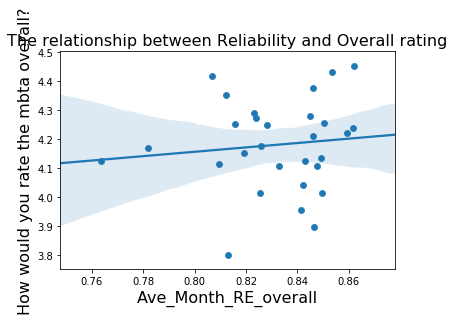

In [3]:

# create and display the scatter plot
graph1 = sns.scatterplot(x="Ave_Month_RE_overall", y="How would you rate the mbta overall?", data = df_1st)

#specify the title
title = "The relationship between Reliability and Overall rating"

#set the title of the plot
graph1.set_title(title, size = 16)

#add labels to the axes  
graph1.set_xlabel("Ave_Month_RE_overall", size = 16)
graph1.set_ylabel("Overall rating", size = 16)

#add regestion line
sns.regplot(x="Ave_Month_RE_overall", y="How would you rate the mbta overall?", data=df_1st)

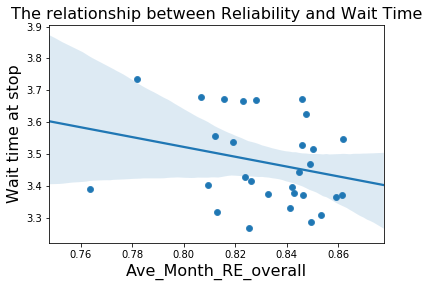

In [4]:
# create and display the scatter plot
graph2 = sns.scatterplot(x="Ave_Month_RE_overall", y="Wait time at stop", data = df_1st)

#specify the title
title = "The relationship between Reliability and Wait Time"

#set the title of the plot
graph2.set_title(title, size = 16)

#add labels to the axes  
graph2.set_xlabel("Ave_Month_RE_overall", size = 16)
graph2.set_ylabel("Wait time at stop", size = 16)

#add regestion line
sns.regplot(x="Ave_Month_RE_overall", y="Wait time at stop", data=df_1st)

Text(0, 0.5, 'Ave_Month_RE_overall')

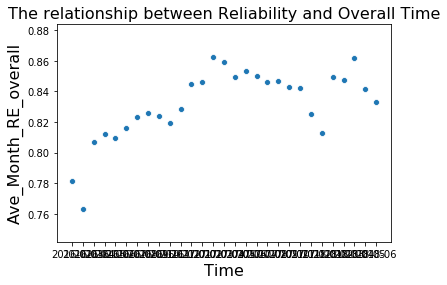

In [5]:
# create and display the scatter plot
graph3 = sns.scatterplot(x="service_date", y="Ave_Month_RE_overall", 
                        data = df_1st)

#specify the title
title = "The relationship between Reliability and Overall Time"

#set the title of the plot
graph3.set_title(title, size = 16)

#add labels to the axes  
graph3.set_xlabel("Time", size = 16)
graph3.set_ylabel("Ave_Month_RE_overall", size = 16)


#### This is visualizing the second hypothesis: Congestion negatively affect customer satisfaction.

In [9]:
df_2nd = pd.read_csv("resources/ridership_congestion_combine.csv")
df_2nd.head()

,Unnamed: 0,date,ridership,train_line,Vehicle crowdedness
0,1,2016-02-01,1.220639e+06,Blue Line,3.5872
1,2,2016-02-01,3.752289e+06,Green Line,3.5872
2,3,2016-02-01,4.379649e+06,Orange Line,3.5872
3,4,2016-02-01,5.132032e+06,Red Line,3.5872
4,5,2016-03-01,1.510118e+06,Blue Line,3.4033


Text(0.5, 0, 'ridership')

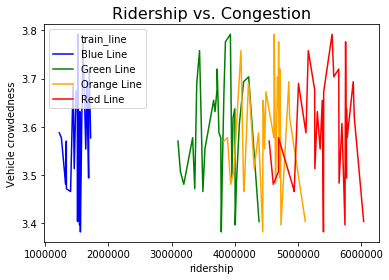

In [7]:
import seaborn as sns

# create and display the line plot
graph4 = sns.lineplot(x="ridership", y="Vehicle crowdedness", hue="train_line", data = df_2nd
                    , palette = ["blue", "green", "orange", "red"])

#specify the title
title = "Ridership vs. Congestion"

#set the title of the plot
graph4.set_title(title, size = 16)

#add labels to the axes  
graph4.set_xlabel("ridership", size = 10)

### 3.3. Model Construction (Dan)
* If you proposed hypotheses, conduct your hypothesis tests
* For your machine learning question(s), split data into training, validation, and testing sets (or use cross-validation)
* Apply machine learning algorithms (apply at least three algorithms)
* Train your algorithms

In [32]:
reliability_df.rename(columns={'service_date':'date'}, inplace=True)
reliability_df.sort_values('date').head()

,train_line,date,pct_reliability
9445,Blue,2016-01-01,0.931625
9444,Blue,2016-01-01,0.928211
9443,Green-E,2016-01-01,0.776051
9442,Green-E,2016-01-01,0.771313
9441,Green-D,2016-01-01,0.780110


In [29]:
satisfaction_df.rename(columns={'survey_date':'date'}, inplace=True)
satisfaction_df.sort_values('date').head()

,date,question_description,satisfaction_score
252,2016-02-01,Stop condition &amp; cleanliness,4.2402
262,2016-02-01,T-alerts,4.0201
263,2016-02-01,Real-time mobile apps (e.g. nextbus),4.0517
265,2016-02-01,How would you rate the mbta overall?,4.1678
266,2016-02-01,How would you rate your most recent trip?,4.1365


In [35]:
rel_satis_combined = pd.merge(reliability_df, satisfaction_df, on='date', how='inner')
all_combined = pd.merge(rel_satis_combined, ridership_df, on='date', how='inner')
all_combined.head()
# all_combined.to_csv("all.csv")

In [ ]:
# df is the dataframe and target_column is the name of the column being targeted
def features_and_target(df, target_column):
    features = df.drop(target_column, axis = 1)
    target = df[target_column]
    return features, target


In [ ]:
from sklearn.model_selection import train_test_split

def split_the_dataset():
    return train_test_split(features, target, random_state=3000)

#X_train, X_test, y_train, y_test = split_the_dataset()

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

estimators = {"Linear Regression" : LinearRegression(),
             "Ridge" : Ridge(),
              "Lasso" : Lasso(),
             "k-Nearest Neighbor": KNeighborsRegressor(),
             "Support Vector Machine" : SVR(gamma="scale")}

In [ ]:
from sklearn.metrics import r2_score

def regressors_percentage_split():
    for estimator_name, estimator_object in estimators.items(): 
        # Fit the dataset
        model = estimator_object.fit(X=X_train, y=y_train)
        # Print the testing results
        print(f"{estimator_name}:")
        print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
        print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))

In [ ]:
regressors_percentage_split()

### 3.4. Model Evaluation (Dan)
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
* Interpret your results from multiple models (and hypothesis tests, if any)

### 3.5. Model Optimization (Dan)
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

In [ ]:
param_grid = {"n_neighbors":[1, 5, 10], "metric": ["euclidean", "manhattan", "minkowski"]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

def grid_search_kNN():
    
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    
    grid_search.fit(X=X_train_selected, y=y_train) 
    
    print("Best parameters: ", grid_search.best_params_)
    
    print("Training set score with best parameters: ", grid_search.best_score_)

    print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))



In [ ]:
grid_search_kNN()

### 3.6. Model Testing (Dan)
* Test your tuned algorithms using your testing set

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Intepret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. 